In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [9]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3148.jpg', 'with_mask_183.jpg', 'with_mask_3289.jpg', 'with_mask_1238.jpg', 'with_mask_579.jpg']
['with_mask_987.jpg', 'with_mask_609.jpg', 'with_mask_1946.jpg', 'with_mask_2300.jpg', 'with_mask_309.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3060.jpg', 'without_mask_3744.jpg', 'without_mask_1596.jpg', 'without_mask_62.jpg', 'without_mask_3680.jpg']
['without_mask_1292.jpg', 'without_mask_117.jpg', 'without_mask_2787.jpg', 'without_mask_1492.jpg', 'without_mask_2669.jpg']


In [14]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [15]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [16]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


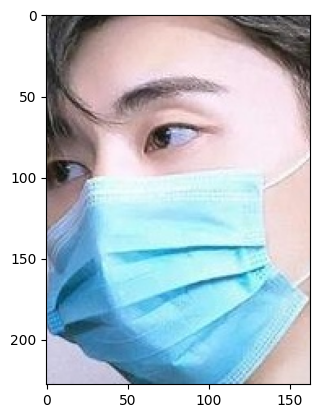

In [19]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

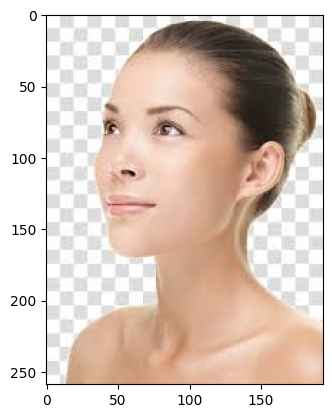

In [20]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [21]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [24]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [25]:
print(X_train[0])


[[[ 38  52  36]
  [ 30  44  27]
  [ 37  52  32]
  ...
  [ 22  37  18]
  [ 21  36  17]
  [ 24  39  19]]

 [[ 35  50  28]
  [ 29  44  22]
  [ 42  57  32]
  ...
  [ 23  38  19]
  [ 24  39  21]
  [ 27  42  22]]

 [[ 31  46  21]
  [ 27  43  16]
  [ 43  59  30]
  ...
  [ 31  46  25]
  [ 34  49  28]
  [ 35  50  27]]

 ...

 [[196 223 252]
  [187 218 250]
  [166 201 239]
  ...
  [ 79 134 216]
  [ 80 134 216]
  [ 79 131 213]]

 [[184 211 253]
  [177 208 251]
  [153 191 239]
  ...
  [ 79 134 216]
  [ 80 134 216]
  [ 78 130 212]]

 [[176 209 253]
  [160 197 244]
  [153 195 247]
  ...
  [ 78 134 217]
  [ 73 131 212]
  [ 75 128 210]]]


In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [28]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [29]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 136s 795ms/step - loss: 0.5485 - acc: 0.7631 - val_loss: 0.2897 - val_acc: 0.8694
Epoch 2/5
170/170 [==============================] - 137s 803ms/step - loss: 0.3068 - acc: 0.8770 - val_loss: 0.2426 - val_acc: 0.8975
Epoch 3/5
170/170 [==============================] - 128s 752ms/step - loss: 0.2542 - acc: 0.8937 - val_loss: 0.2158 - val_acc: 0.9124
Epoch 4/5
170/170 [==============================] - 130s 763ms/step - loss: 0.2112 - acc: 0.9163 - val_loss: 0.1837 - val_acc: 0.9339
Epoch 5/5
170/170 [==============================] - 128s 754ms/step - loss: 0.1777 - acc: 0.9273 - val_loss: 0.1677 - val_acc: 0.9355


In [30]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 10s 204ms/step - loss: 0.1893 - acc: 0.9272
Test Accuracy = 0.9272005558013916


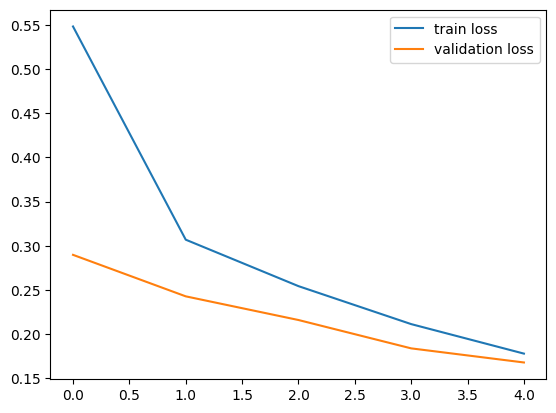

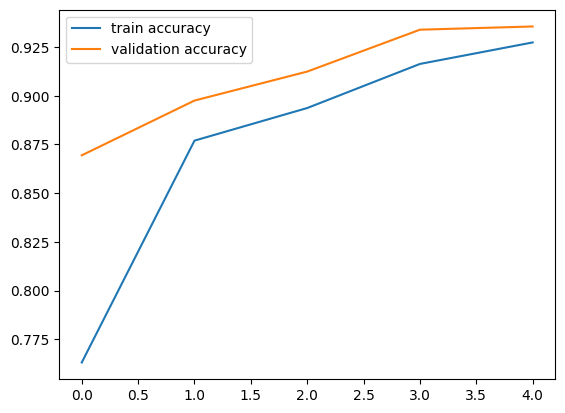

In [31]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/without_mask_40.jpg


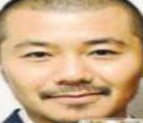

1/1 [==============================] - 0s 28ms/step
[[0.2871222  0.91420525]]
1
The person in the image is not wearing a mask


In [33]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/with_mask_28.jpg


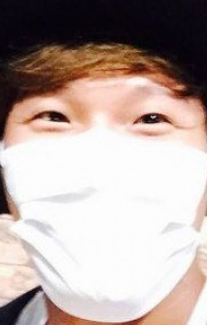

1/1 [==============================] - 0s 27ms/step
[[0.6825277  0.37070495]]
0
The person in the image is wearing a mask


In [34]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')